In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
df = pd.read_csv('Property_with_Feature_Engineering.csv')
df.head(3)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   price_bin      191393 non-null  object 
 6   location       191393 non-null  object 
 7   city           191393 non-null  object 
 8   province_name  191393 non-null  object 
 9   locality       191393 non-null  object 
 10  latitude       191393 non-null  float64
 11  longitude      191393 non-null  float64
 12  baths          191393 non-null  int64  
 13  area           191393 non-null  object 
 14  area_marla     191393 non-null  float64
 15  area_sqft      191393 non-null  float64
 16  purpose        191393 non-null  object 
 17  bedrooms       191393 non-nul

In [65]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

# Step 1: Feature Filtering

- Agency and Agent Drop

In [66]:
df.drop(['agent', 'agency'], axis=1, inplace=True)
df.isnull().sum()

property_id      0
location_id      0
page_url         0
property_type    0
price            0
price_bin        0
location         0
city             0
province_name    0
locality         0
latitude         0
longitude        0
baths            0
area             0
area_marla       0
area_sqft        0
purpose          0
bedrooms         0
date_added       0
year             0
month            0
day              0
dtype: int64

- Page URL Drop

In [67]:
df.drop(['page_url'],axis=1,inplace=True)
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'city', 'province_name', 'locality', 'latitude',
       'longitude', 'baths', 'area', 'area_marla', 'area_sqft', 'purpose',
       'bedrooms', 'date_added', 'year', 'month', 'day'],
      dtype='object')

- Price Bin Encoding

In [68]:
df.price_bin

0         Very High
1         Very High
2               Low
3         Very High
4              High
            ...    
191388    Very High
191389       Medium
191390         High
191391          Low
191392          Low
Name: price_bin, Length: 191393, dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.price_bin = le.fit_transform(df.price_bin)
df.price_bin

0         3
1         3
2         1
3         3
4         0
         ..
191388    3
191389    2
191390    0
191391    1
191392    1
Name: price_bin, Length: 191393, dtype: int64

- Encoding Property ID

In [70]:
df.property_id

0           347795
1           482892
2           555962
3           562843
4           686990
            ...   
191388    17468383
191389    17468384
191390    17468482
191391    17468586
191392    17468660
Name: property_id, Length: 191393, dtype: int64

In [71]:
df.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Penthouse', 'Upper Portion',
       'Farm House', 'Room'], dtype=object)

In [72]:
df.property_type = le.fit_transform(df.property_type)
df.property_type.unique()

array([2, 1, 3, 4, 6, 0, 5])

In [73]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'city', 'province_name', 'locality', 'latitude',
       'longitude', 'baths', 'area', 'area_marla', 'area_sqft', 'purpose',
       'bedrooms', 'date_added', 'year', 'month', 'day'],
      dtype='object')

- Analyzing Price Column

In [74]:
df.price

0         220000000
1          40000000
2           9500000
3         125000000
4          21000000
            ...    
191388        70000
191389        40000
191390       160000
191391        25000
191392        26000
Name: price, Length: 191393, dtype: int64

 - Analyzing Location Column

In [75]:
df.location = le.fit_transform(df.location)
df.location

0          980
1         1002
2          430
3          574
4          120
          ... 
191388     684
191389     684
191390     497
191391     358
191392     678
Name: location, Length: 191393, dtype: int64

In [76]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'city', 'province_name', 'locality', 'latitude',
       'longitude', 'baths', 'area', 'area_marla', 'area_sqft', 'purpose',
       'bedrooms', 'date_added', 'year', 'month', 'day'],
      dtype='object')

- Making Dummies for City Column

In [77]:
df.city.unique()

array(['Lahore', 'Karachi', 'Islamabad', 'Faisalabad', 'Rawalpindi'],
      dtype=object)

In [78]:
city_dummies = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, city_dummies], axis=1)
df.drop(['city'],axis=1,inplace=True)
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'province_name', 'locality', 'latitude', 'longitude',
       'baths', 'area', 'area_marla', 'area_sqft', 'purpose', 'bedrooms',
       'date_added', 'year', 'month', 'day', 'city_Faisalabad',
       'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi'],
      dtype='object')

- Making Dummies for Province Column

In [79]:
df['province_name'].unique()

array(['Punjab', 'Sindh', 'Islamabad Capital'], dtype=object)

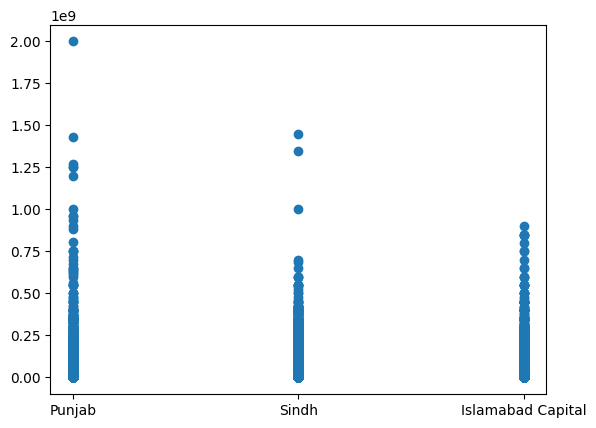

In [80]:
plt.scatter(x=df.province_name,y=df.price)

<Axes: xlabel='province_name', ylabel='price'>

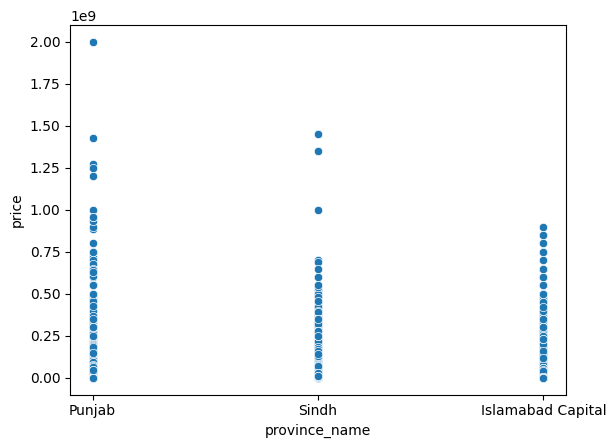

In [81]:
sn.scatterplot(df,x='province_name',y='price')

<Axes: xlabel='province_name', ylabel='price'>

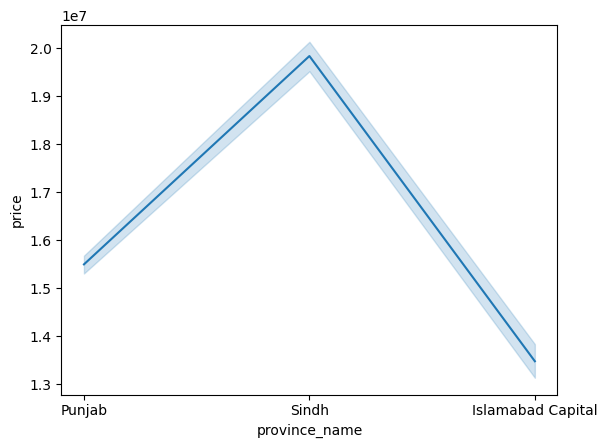

In [82]:
sn.lineplot(df,x='province_name',y='price')

In [83]:
df_see = pd.read_csv('Property_with_Feature_Engineering.csv')
df_see.head(3)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"


- Making Dummies for Province Column

In [84]:
province_dummies = pd.get_dummies(df['province_name'], prefix='province_name')
df = pd.concat([df, province_dummies], axis=1)
df.drop(['province_name'],axis=1,inplace=True)
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'latitude', 'longitude', 'baths', 'area',
       'area_marla', 'area_sqft', 'purpose', 'bedrooms', 'date_added', 'year',
       'month', 'day', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

- Tackling the Locality Column

In [85]:
df['locality'].unique()

array(['Model Town, Lahore, Punjab', 'Multan Road, Lahore, Punjab',
       'Eden, Lahore, Punjab', ..., 'Shabbir Town, Lahore, Punjab',
       'Angori Scheme 1, Lahore, Punjab', 'Abid Road, Lahore, Punjab'],
      shape=(1619,), dtype=object)

In [86]:
df['locality'] = le.fit_transform(df.locality)
df.locality

0         1042
1         1063
2          459
3          610
4          126
          ... 
191388     722
191389     722
191390     521
191391     375
191392     716
Name: locality, Length: 191393, dtype: int64

In [87]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'latitude', 'longitude', 'baths', 'area',
       'area_marla', 'area_sqft', 'purpose', 'bedrooms', 'date_added', 'year',
       'month', 'day', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

- Analyzing the Impact of the Latitude and Longitude Column

In [88]:
df.latitude

0         31.483869
1         31.431593
2         31.499348
3         31.522069
4         31.506483
            ...    
191388    33.668497
191389    33.668497
191390    33.676104
191391    33.527944
191392    33.649779
Name: latitude, Length: 191393, dtype: float64

In [89]:
df.longitude

0         74.325686
1         74.179980
2         74.416959
3         74.355512
4         74.286017
            ...    
191388    73.074160
191389    73.074160
191390    73.013842
191391    73.161392
191392    73.029385
Name: longitude, Length: 191393, dtype: float64

<Axes: xlabel='latitude', ylabel='price'>

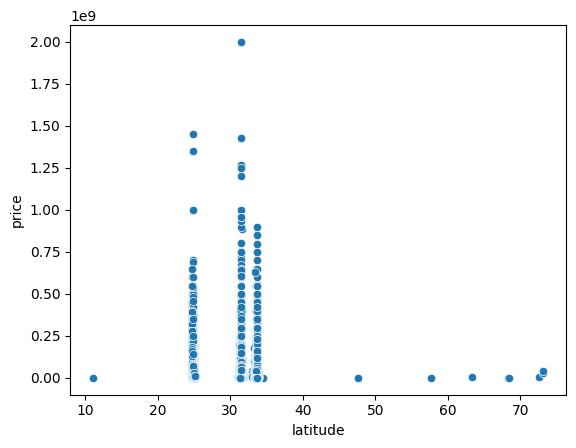

In [90]:
sn.scatterplot(df,x='latitude',y='price')

<Axes: xlabel='longitude', ylabel='price'>

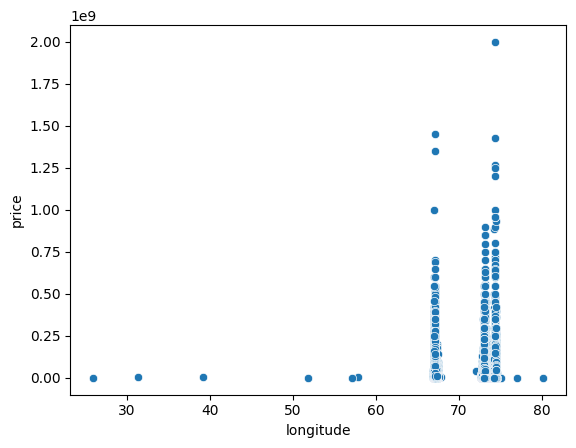

In [91]:
sn.scatterplot(df,x='longitude',y='price')

- Dropping the columns

In [92]:
df.drop(['latitude','longitude'],axis=1,inplace=True)
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day',
       'city_Faisalabad', 'city_Islamabad', 'city_Karachi', 'city_Lahore',
       'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

-  Analyzing the Baths Column

In [ ]:
df.baths.unique()

array([  0,   5,   7,   6,   4,   3,   2,   8,   1,  10,   9,  11,  13,
        12, 403,  14,  15])

In [ ]:
df.drop(df[df.baths==403].index,axis=0,inplace=True)
df.baths.unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 13, 12, 14, 15])

In [ ]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day',
       'city_Faisalabad', 'city_Islamabad', 'city_Karachi', 'city_Lahore',
       'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

- Picking one out of all the area columns

In [ ]:
df.area

0            6 Kanal
1            1 Kanal
2            9 Marla
3            1 Kanal
4           11 Marla
             ...    
191388    12.4 Marla
191389    12.4 Marla
191390       1 Kanal
191391     2.7 Marla
191392       0 Marla
Name: area, Length: 191392, dtype: object

In [ ]:
df.area_marla

0         120.0
1          20.0
2           9.0
3          20.0
4          11.0
          ...  
191388     12.4
191389     12.4
191390     20.0
191391      2.7
191392      0.0
Name: area_marla, Length: 191392, dtype: float64

In [ ]:
df.area_sqft

0         32670.12
1          5445.02
2          2450.26
3          5445.02
4          2994.76
            ...   
191388     3375.91
191389     3375.91
191390     5445.02
191391      735.08
191392        0.00
Name: area_sqft, Length: 191392, dtype: float64

In [ ]:
df.drop(['area','area_marla'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'baths', 'area_sqft', 'purpose', 'bedrooms',
       'date_added', 'year', 'month', 'day', 'city_Faisalabad',
       'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi',
       'province_name_Islamabad Capital', 'province_name_Punjab',
       'province_name_Sindh'],
      dtype='object')

In [ ]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [ ]:
df.purpose = le.fit_transform(df.purpose)
df.purpose.unique()

array([1, 0])

# Seperating For Sale and For Rent Columns

In [221]:
df_sale = df[df['purpose']==1]
df_sale

,property_id,location_id,property_type,price,price_bin,location,locality,baths,area_sqft,purpose,...,month,day,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,347795,8,2,220000000,3,980,1042,0,32670.12,1,...,7,17,False,False,False,True,False,False,True,False
1,482892,48,2,40000000,3,1002,1063,5,5445.02,1,...,10,6,False,False,False,True,False,False,True,False
2,555962,75,2,9500000,1,430,459,0,2450.26,1,...,7,3,False,False,False,True,False,False,True,False
3,562843,3821,2,125000000,3,574,610,7,5445.02,1,...,4,4,False,False,False,True,False,False,True,False
4,686990,3522,2,21000000,0,120,126,5,2994.76,1,...,4,4,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,17465369,3226,2,3600000,1,358,375,2,1361.25,1,...,7,24,False,True,False,False,False,True,False,False
190972,17465401,330,2,17000000,0,500,524,5,1089.00,1,...,7,24,False,True,False,False,False,True,False,False
190973,17465447,3341,2,16800000,0,500,524,5,1089.00,1,...,7,24,False,True,False,False,False,True,False,False
190974,17465516,330,2,26500000,0,500,524,7,2178.01,1,...,7,24,False,True,False,False,False,True,False,False


In [222]:
df_rent = df[df['purpose']==0]
df_rent

,property_id,location_id,property_type,price,price_bin,location,locality,baths,area_sqft,purpose,...,month,day,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
657,410997,1447,2,100000,0,358,377,5,5445.02,0,...,7,24,False,False,False,True,False,False,True,False
658,411001,9,2,95000,0,358,377,5,5445.02,0,...,7,24,False,False,False,True,False,False,True,False
659,411006,9,2,90000,0,358,377,5,5445.02,0,...,7,24,False,False,False,True,False,False,True,False
660,411012,9,2,175000,0,358,377,6,10890.04,0,...,7,24,False,False,False,True,False,False,True,False
661,411180,1588,2,95000,0,358,377,5,5445.02,0,...,7,24,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,17468383,174,6,70000,3,684,722,0,3375.91,0,...,7,24,False,True,False,False,False,True,False,False
191389,17468384,174,6,40000,2,684,722,0,3375.91,0,...,7,24,False,True,False,False,False,True,False,False
191390,17468482,167,2,160000,0,497,521,6,5445.02,0,...,7,24,False,True,False,False,False,True,False,False
191391,17468586,339,1,25000,1,358,375,2,735.08,0,...,7,24,False,True,False,False,False,True,False,False


- Picking out the rest of the necessary columns

In [223]:
df.bedrooms.unique()

array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 12, 14, 15, 16, 13,
       18, 28, 25, 21, 68, 27, 20])

In [224]:
df.date_added.unique().shape

(148,)

In [225]:
df.year.unique()

array([2019, 2018])

In [226]:
df.month.unique()

array([ 7, 10,  4,  6,  1, 12,  5,  2,  3, 11,  8,  9])

In [227]:
df_sale.drop(['date_added','month','day'],axis=1,inplace=True)
df_sale.columns

C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\908274887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop(['date_added','month','day'],axis=1,inplace=True)


Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'baths', 'area_sqft', 'purpose', 'bedrooms',
       'year', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

In [228]:
df_rent.drop(['date_added','month','day'],axis=1,inplace=True)
df_rent.columns

C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\2802455816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent.drop(['date_added','month','day'],axis=1,inplace=True)


Index(['property_id', 'location_id', 'property_type', 'price', 'price_bin',
       'location', 'locality', 'baths', 'area_sqft', 'purpose', 'bedrooms',
       'year', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh'],
      dtype='object')

# Step 3: Isolating the For Sale dataset

In [229]:
df_sale

,property_id,location_id,property_type,price,price_bin,location,locality,baths,area_sqft,purpose,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,347795,8,2,220000000,3,980,1042,0,32670.12,1,0,2019,False,False,False,True,False,False,True,False
1,482892,48,2,40000000,3,1002,1063,5,5445.02,1,5,2018,False,False,False,True,False,False,True,False
2,555962,75,2,9500000,1,430,459,0,2450.26,1,3,2019,False,False,False,True,False,False,True,False
3,562843,3821,2,125000000,3,574,610,7,5445.02,1,8,2019,False,False,False,True,False,False,True,False
4,686990,3522,2,21000000,0,120,126,5,2994.76,1,6,2019,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,17465369,3226,2,3600000,1,358,375,2,1361.25,1,2,2019,False,True,False,False,False,True,False,False
190972,17465401,330,2,17000000,0,500,524,5,1089.00,1,4,2019,False,True,False,False,False,True,False,False
190973,17465447,3341,2,16800000,0,500,524,5,1089.00,1,4,2019,False,True,False,False,False,True,False,False
190974,17465516,330,2,26500000,0,500,524,7,2178.01,1,5,2019,False,True,False,False,False,True,False,False


In [230]:
df_sale.drop(['property_id','location_id','price_bin'],axis=1,inplace=True)
df_sale

C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\1149589793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop(['property_id','location_id','price_bin'],axis=1,inplace=True)


,property_type,price,location,locality,baths,area_sqft,purpose,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,2,220000000,980,1042,0,32670.12,1,0,2019,False,False,False,True,False,False,True,False
1,2,40000000,1002,1063,5,5445.02,1,5,2018,False,False,False,True,False,False,True,False
2,2,9500000,430,459,0,2450.26,1,3,2019,False,False,False,True,False,False,True,False
3,2,125000000,574,610,7,5445.02,1,8,2019,False,False,False,True,False,False,True,False
4,2,21000000,120,126,5,2994.76,1,6,2019,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,2,3600000,358,375,2,1361.25,1,2,2019,False,True,False,False,False,True,False,False
190972,2,17000000,500,524,5,1089.00,1,4,2019,False,True,False,False,False,True,False,False
190973,2,16800000,500,524,5,1089.00,1,4,2019,False,True,False,False,False,True,False,False
190974,2,26500000,500,524,7,2178.01,1,5,2019,False,True,False,False,False,True,False,False


In [231]:
import numpy as np

# Drop 'purpose' column
df_sale.drop(['purpose'], axis=1, inplace=True)

df_sale['price_per_sqft'] = (df_sale['price'] / df_sale['area_sqft']).round(2)

df_sale

C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\4108746630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop(['purpose'], axis=1, inplace=True)
C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\4108746630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['price_per_sqft'] = (df_sale['price'] / df_sale['area_sqft']).round(2)


,property_type,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,price_per_sqft
0,2,220000000,980,1042,0,32670.12,0,2019,False,False,False,True,False,False,True,False,6733.98
1,2,40000000,1002,1063,5,5445.02,5,2018,False,False,False,True,False,False,True,False,7346.16
2,2,9500000,430,459,0,2450.26,3,2019,False,False,False,True,False,False,True,False,3877.14
3,2,125000000,574,610,7,5445.02,8,2019,False,False,False,True,False,False,True,False,22956.76
4,2,21000000,120,126,5,2994.76,6,2019,False,False,False,True,False,False,True,False,7012.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,2,3600000,358,375,2,1361.25,2,2019,False,True,False,False,False,True,False,False,2644.63
190972,2,17000000,500,524,5,1089.00,4,2019,False,True,False,False,False,True,False,False,15610.65
190973,2,16800000,500,524,5,1089.00,4,2019,False,True,False,False,False,True,False,False,15427.00
190974,2,26500000,500,524,7,2178.01,5,2019,False,True,False,False,False,True,False,False,12167.07


In [246]:
import numpy as np

# Get rows with any inf or -inf values
np.isinf(df_sale).sum()

property_type                       0
price                               0
location                            0
locality                            0
baths                               0
area_sqft                           0
bedrooms                            0
year                                0
city_Faisalabad                     0
city_Islamabad                      0
city_Karachi                        0
city_Lahore                         0
city_Rawalpindi                     0
province_name_Islamabad Capital     0
province_name_Punjab                0
province_name_Sindh                 0
price_per_sqft                     11
dtype: int64

In [247]:
df_sale = df_sale.loc[:, ~np.isinf(df_sale).any()]

In [248]:
np.isinf(df_sale).sum()

property_type                      0
price                              0
location                           0
locality                           0
baths                              0
area_sqft                          0
bedrooms                           0
year                               0
city_Faisalabad                    0
city_Islamabad                     0
city_Karachi                       0
city_Lahore                        0
city_Rawalpindi                    0
province_name_Islamabad Capital    0
province_name_Punjab               0
province_name_Sindh                0
dtype: int64

In [249]:
df_sale.head(3)

,property_type,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,2,220000000,980,1042,0,32670.12,0,2019,False,False,False,True,False,False,True,False
1,2,40000000,1002,1063,5,5445.02,5,2018,False,False,False,True,False,False,True,False
2,2,9500000,430,459,0,2450.26,3,2019,False,False,False,True,False,False,True,False


In [250]:
df_sale.baths.unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 13, 12, 14])

In [251]:
df_sale.bedrooms.unique()

array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 12, 14, 15, 16, 13,
       18, 25, 27])

In [252]:
df_sale.isna().sum()

property_type                      0
price                              0
location                           0
locality                           0
baths                              0
area_sqft                          0
bedrooms                           0
year                               0
city_Faisalabad                    0
city_Islamabad                     0
city_Karachi                       0
city_Lahore                        0
city_Rawalpindi                    0
province_name_Islamabad Capital    0
province_name_Punjab               0
province_name_Sindh                0
dtype: int64

In [253]:
df_sale.head(3)

,property_type,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,2,220000000,980,1042,0,32670.12,0,2019,False,False,False,True,False,False,True,False
1,2,40000000,1002,1063,5,5445.02,5,2018,False,False,False,True,False,False,True,False
2,2,9500000,430,459,0,2450.26,3,2019,False,False,False,True,False,False,True,False


In [254]:
df_sale['price']=df['price']

C:\Users\REZ\AppData\Local\Temp\ipykernel_10684\3915749756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['price']=df['price']


In [255]:
X=df_sale.drop(['price'],axis=1)
y=df_sale.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [256]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [257]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [258]:
rfr.score(X_test,y_test)

0.8323920254119379

In [259]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [260]:
dtr.score(X_test,y_test)

0.7915740451395918

In [261]:
ecv = ElasticNetCV()
ecv.fit(X_train,y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [262]:
ecv.score(X_test,y_test)

0.0007146717779749068

In [263]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [264]:
lr.score(X_test,y_test)

0.14046914678149303

In [265]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [266]:
knr.score(X_test,y_test)

0.7147034306563693

In [267]:
from sklearn.neural_network import MLPRegressor

# Create and train the neural network regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
score = mlp.score(X_test, y_test)
print("MLPRegressor R^2 score:", score)

MLPRegressor R^2 score: 0.5343566366061157


In [268]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.tree import ExtraTreeRegressor


# Example usage:
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()
svr = SVR()
ridge = Ridge()
lasso = Lasso()
bayes_ridge = BayesianRidge()
extra_tree = ExtraTreeRegressor()


In [269]:
gbr.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [270]:
gbr.score(X_test,y_test)

0.7718265194301034

In [271]:
abr.fit(X_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [272]:
abr.score(X_test,y_test)

-4.218342496587634

In [273]:
etr.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [274]:
etr.score(X_test,y_test)

0.8134323229319949

In [275]:
svr.fit(X_train,y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [276]:
svr.score(X_test,y_test)

-0.07937569932433064

In [ ]:
extra_tree.fit(X_train,y_train)

c:\Users\REZ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.926e+19, tolerance: 1.582e+16
  model = cd_fast.enet_coordinate_descent(


,criterion,'squared_error'
,splitter,'random'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,random_state,None
,min_impurity_decrease,0.0
,max_leaf_nodes,None
,ccp_alpha,0.0


In [282]:
extra_tree.score(X_test,y_test)

0.7681982633758673

In [278]:
ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [283]:
ridge.score(X_test,y_test)

0.14046893756552137

In [279]:
lasso.fit(X_train,y_train)

c:\Users\REZ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.926e+19, tolerance: 1.582e+16
  model = cd_fast.enet_coordinate_descent(


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [284]:
lasso.score(X_test,y_test)

0.13964547949578465

In [285]:
bayes_ridge.fit(X_train,y_train)

,max_iter,300
,tol,0.001
,alpha_1,1e-06
,alpha_2,1e-06
,lambda_1,1e-06
,lambda_2,1e-06
,alpha_init,None
,lambda_init,None
,compute_score,False
,fit_intercept,True
,copy_X,True


In [286]:
bayes_ridge.score(X_test,y_test)

0.14045062103803196

In [287]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [288]:
xgb.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [289]:
xgb.score(X_test,y_test)

0.7839937806129456

In [292]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import ElasticNetCV, LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "ElasticNetCV": ElasticNetCV(),
    "LinearRegression": LinearRegression(),
    "KNeighbors": KNeighborsRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
    "ExtraTree": ExtraTreeRegressor(),
    "XGBoost": XGBRegressor()
}

param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10, 20]
    },
    "DecisionTree": {
        "max_depth": [None, 10, 20]
    },
    "ElasticNetCV": {
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "LinearRegression": {},
    "KNeighbors": {
        "n_neighbors": [3, 5, 7]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1]
    },
    "AdaBoost": {
        "n_estimators": [50, 100]
    },
    "ExtraTrees": {
        "n_estimators": [50, 100]
    },
    "Ridge": {
        "alpha": [0.1, 1, 10]
    },
    "Lasso": {
        "alpha": [0.1, 1, 10]
    },
    "BayesianRidge": {},
    "ExtraTree": {},
    "XGBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1]
    }
}

for name, model in models.items():
    grid = GridSearchCV(model, param_grids.get(name, {}), cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    print(f"{name}: Best R2 = {grid.best_score_:.4f}, Best Params = {grid.best_params_}")

RandomForest: Best R2 = 0.7787, Best Params = {'max_depth': None, 'n_estimators': 100}
DecisionTree: Best R2 = 0.6791, Best Params = {'max_depth': 10}
ElasticNetCV: Best R2 = -0.0043, Best Params = {'l1_ratio': 0.9}
LinearRegression: Best R2 = 0.1103, Best Params = {}
KNeighbors: Best R2 = 0.6690, Best Params = {'n_neighbors': 5}
GradientBoosting: Best R2 = 0.7180, Best Params = {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost: Best R2 = -2.4565, Best Params = {'n_estimators': 50}
ExtraTrees: Best R2 = 0.7700, Best Params = {'n_estimators': 100}
Ridge: Best R2 = 0.1103, Best Params = {'alpha': 10}


c:\Users\REZ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.615e+19, tolerance: 1.974e+16
  model = cd_fast.enet_coordinate_descent(


Lasso: Best R2 = 0.1107, Best Params = {'alpha': 0.1}
BayesianRidge: Best R2 = 0.0760, Best Params = {}
ExtraTree: Best R2 = 0.6282, Best Params = {}
XGBoost: Best R2 = 0.7786, Best Params = {'learning_rate': 0.1, 'n_estimators': 100}


In [293]:
df_sale

,property_type,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,2,220000000,980,1042,0,32670.12,0,2019,False,False,False,True,False,False,True,False
1,2,40000000,1002,1063,5,5445.02,5,2018,False,False,False,True,False,False,True,False
2,2,9500000,430,459,0,2450.26,3,2019,False,False,False,True,False,False,True,False
3,2,125000000,574,610,7,5445.02,8,2019,False,False,False,True,False,False,True,False
4,2,21000000,120,126,5,2994.76,6,2019,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,2,3600000,358,375,2,1361.25,2,2019,False,True,False,False,False,True,False,False
190972,2,17000000,500,524,5,1089.00,4,2019,False,True,False,False,False,True,False,False
190973,2,16800000,500,524,5,1089.00,4,2019,False,True,False,False,False,True,False,False
190974,2,26500000,500,524,7,2178.01,5,2019,False,True,False,False,False,True,False,False


In [295]:
df_sale.to_csv('For Sale.csv',index=False)